In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Common Activation Functions

## The Sigmoid Function


In [35]:
def sigmoid(z):
    exp_minus_z = np.exp(-z)
    frac = 1/(1+exp_minus_z)
    
    return frac

# The derivative of sigmoid
def diff_sigmoid(z):
    sigma_z = sigmoid(z)
    f = sigma_z*(1-sigma_z)
    return f

In [74]:
# Generate input values from -10 to 10, which covers the range of interest
x_values = np.linspace(-10, 10, 400)
# Compute the sigmoid function for each input
y_values = sigmoid(x_values)
# Compute the derivative of the sigmoid function for each input
y_derivatives = diff_sigmoid(x_values)

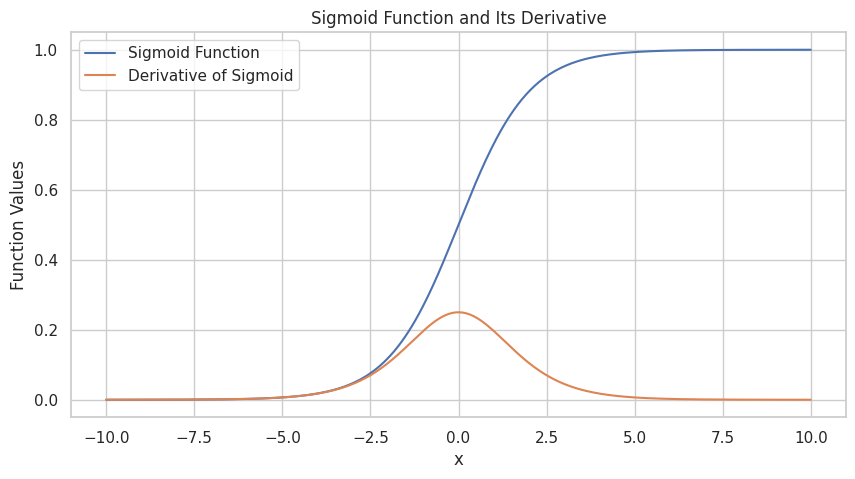

In [44]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a plot with a specific size
plt.figure(figsize=(10, 5))

# Plot the sigmoid function
sns.lineplot(x=x_values, y=y_values, label='Sigmoid Function')

# Plot the derivative of the sigmoid function
sns.lineplot(x=x_values, y=y_derivatives, label='Derivative of Sigmoid')

# Adding the title and labels
plt.title('Sigmoid Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('Function Values')

# Show the plot
plt.show()

## Hyperbolic Tangent



In [46]:
def h_tan(z):
    exp_z = np.exp(z)
    exp_minus_z = np.exp(-z)

    a = exp_z-exp_minus_z
    b = exp_z+exp_minus_z
    return a/b

def diff_h_tan(z):
    g2 = h_tan(z)**2
    return 1-g2

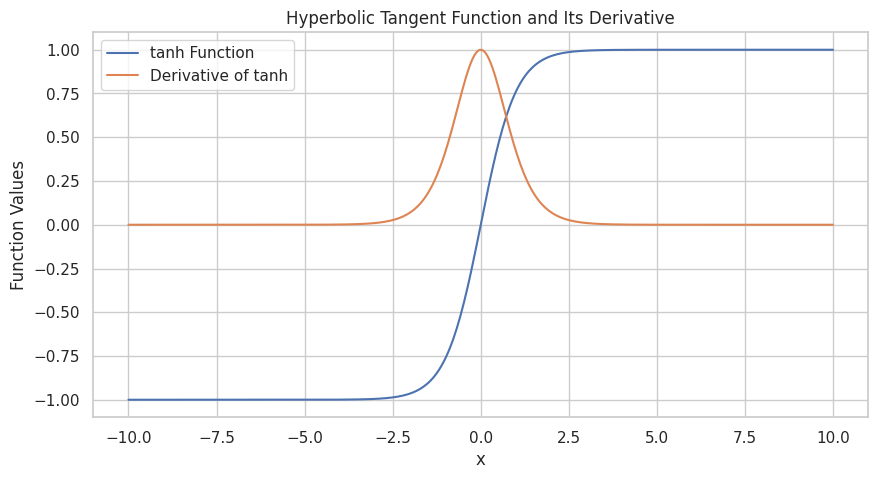

In [49]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a plot with a specific size
plt.figure(figsize=(10, 5))

# Plot the sigmoid function
sns.lineplot(x=x_values, y=h_tan(x_values), label='tanh Function')

# Plot the derivative of the sigmoid function
sns.lineplot(x=x_values, y=diff_h_tan(x_values), label='Derivative of tanh')

# Adding the title and labels
plt.title('Hyperbolic Tangent Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('Function Values')

# Show the plot
plt.show()

# Rectified Linear Unit (Relu)


In [63]:
def ReLU(z):
    return np.maximum(0,z)

def diff_ReLU(z):
    return np.where(z>0,1,0)


### Obs: np.where(condition, [x, y])

where(condition, [x, y])

Return elements chosen from x or y depending on condition.

### Parameters
condition : array_like, bool
    Where True, yield x, otherwise yield y.

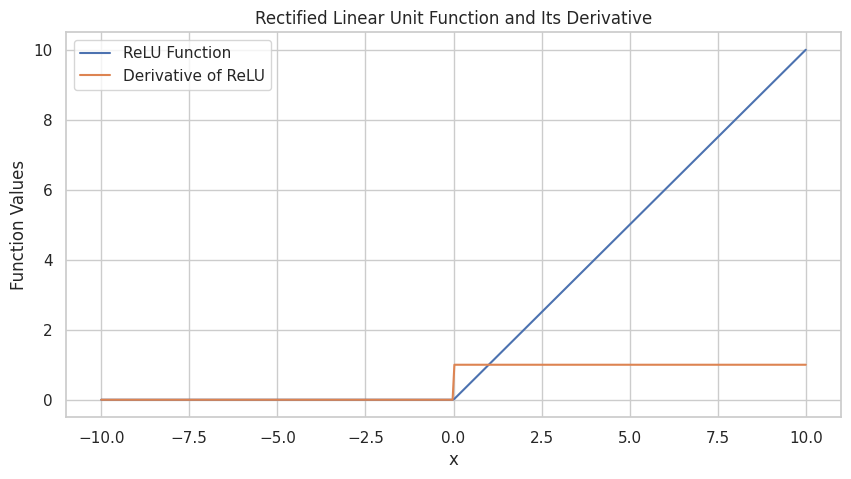

In [66]:
# Create a plot with a specific size
plt.figure(figsize=(10, 5))

# Plot the sigmoid function
sns.lineplot(x=x_values, y=ReLU(x_values), label='ReLU Function')

# Plot the derivative of the sigmoid function
sns.lineplot(x=x_values, y=diff_ReLU(x_values), label='Derivative of ReLU')

# Adding the title and labels
plt.title('Rectified Linear Unit Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('Function Values')

# Show the plot
plt.show()

## Encapsulating All of that Using Classes



In [73]:
class ActivationFunctions:
    def __init__(self, x_values):
        self.x = x_values

    def relu(self):
        return np.maximum(0, self.x)

    def diff_relu(self):
        return np.where(self.x > 0, 1, 0)

    def sigmoid(self):
        return 1 / (1 + np.exp(-self.x))

    def diff_sigmoid(self):
        sig = self.sigmoid()
        return sig * (1 - sig)

    def tanh(self):
        return np.tanh(self.x)

    def diff_tanh(self):
        return 1 - np.tanh(self.x)**2

    def plot(self, func_name):
        """Plot the specified activation function and its derivative."""
        if func_name == 'relu':
            y = self.relu()
            dy = self.diff_relu()
        elif func_name == 'sigmoid':
            y = self.sigmoid()
            dy = self.diff_sigmoid()
        elif func_name == 'tanh':
            y = self.tanh()
            dy = self.diff_tanh()
        else:
            raise ValueError("Unsupported function. Choose 'relu', 'sigmoid', or 'tanh'.")

        plt.figure(figsize=(10, 5))
        plt.plot(self.x, y, label=f'{func_name.capitalize()} Function', linewidth=2)
        plt.plot(self.x, dy, label=f'{func_name.capitalize()} Derivative', linestyle='--')
        plt.title(f'{func_name.capitalize()} Activation Function and Its Derivative')
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.grid(True)
        plt.legend()
        plt.show()

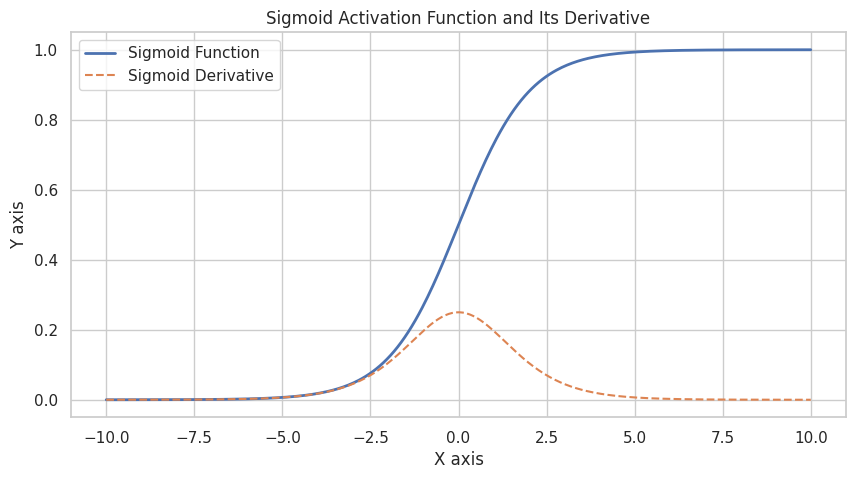

In [75]:
activations = ActivationFunctions(x_values)
activations.plot('sigmoid')
